In [61]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [62]:
# 1) Завантажити дані, вивести назви колонок і розмір датасета


In [63]:
df = pd.read_csv("ParisHousingClass99.88.csv")

In [64]:
print(df.columns)

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')


In [65]:
print(df.shape)

(10000, 18)


In [66]:
# 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [67]:
print(df.isnull().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64


In [68]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [69]:
df.dtypes

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object

In [70]:
df['target'] =(df['category']== 'Luxury').astype("int")

In [71]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,target
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury,1
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury,1


In [72]:
#3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

<Axes: >

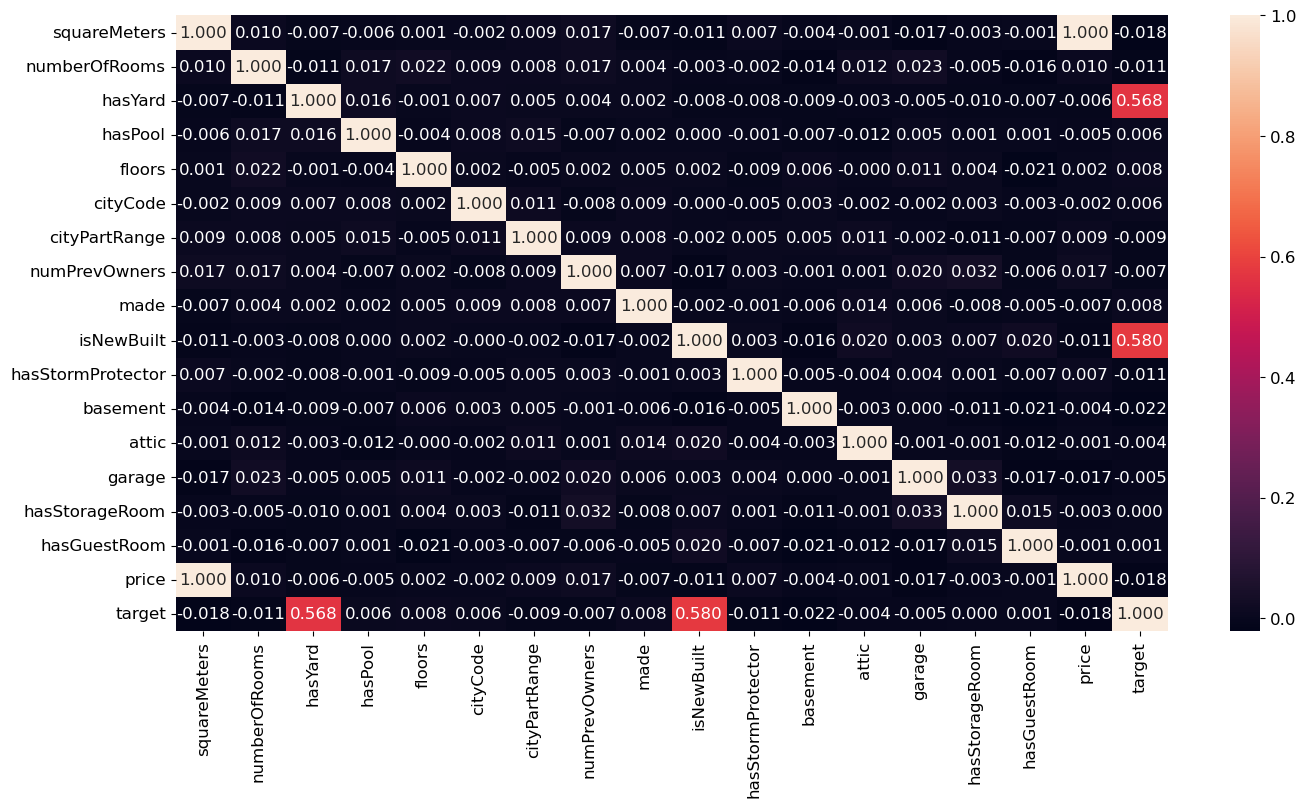

In [73]:

corr_df = df.drop(['category'], axis=1).corr()

plt.figure(figsize=(16,8))

sns.heatmap(corr_df,annot=True,fmt=".3f")


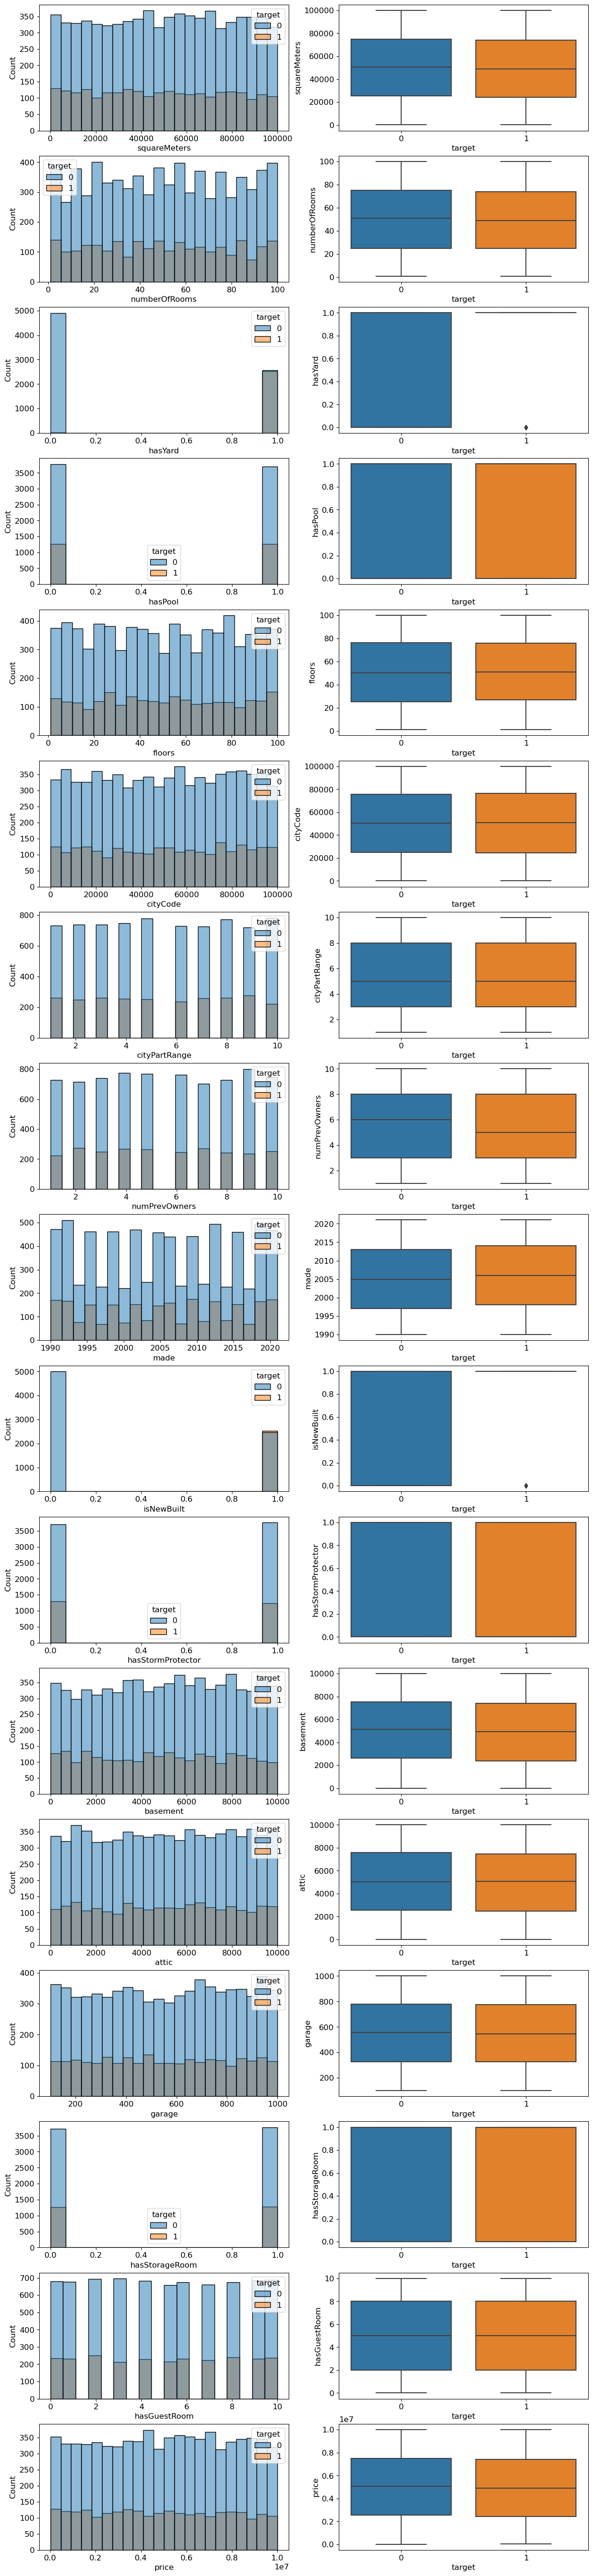

In [75]:
features = df.drop(['target','category'],axis=1).columns

plt.rcParams['figure.figsize'] = [15, 70]
plt.rcParams['font.size'] = 12

fig, axs = plt.subplots(17, 2)
for n in range(0, len(features)):
    sns.histplot(data=df, x =features[n],hue="target", ax = axs[n,0])
    sns.boxplot(data=df, y =features[n],x="target", ax = axs[n,1])

In [76]:
# 4) Нормалізація даних

In [78]:
X = df[features].values
y = df['target'].values

X = preprocessing.MinMaxScaler().fit_transform(X)
pd.DataFrame(X, columns=features).head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0.755020,0.020202,0.0,1.0,0.626263,0.093747,0.222222,0.777778,0.483871,0.0,1.0,0.4313,0.900490,0.951111,0.0,0.7,0.755144
1,0.807547,0.383838,1.0,1.0,0.979798,0.393977,0.777778,0.555556,0.806452,1.0,0.0,0.3653,0.243524,0.031111,1.0,0.2,0.807854
2,0.556731,0.575758,0.0,1.0,0.181818,0.344712,0.555556,0.777778,1.000000,0.0,0.0,0.2937,0.885189,0.038889,1.0,0.9,0.556630
3,0.322560,0.464646,0.0,0.0,0.050505,0.279500,1.000000,0.333333,0.709677,0.0,1.0,0.0659,0.714071,0.287778,0.0,0.3,0.322339
4,0.704034,0.181818,1.0,1.0,0.898990,0.380610,0.222222,0.666667,0.000000,1.0,0.0,0.8435,0.242824,0.213333,1.0,0.4,0.704723


In [79]:
# 5) Провести навчання наступних класифікаторів: kNN, дерево прийняття рішень, SVM, Random Forest, AdaBoost
    
#Підібрати оптимальні параметри
 # • для kNN
 # • для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

# Серед обраних оптимальних моделей кожного класу вибрати найкращу.

# Відобразити sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,stratify=y)

In [81]:
DS_classifier = DecisionTreeClassifier().fit(X_train,y_train)
RF_classifier = RandomForestClassifier().fit(X_train,y_train)
AdaBoost_classifier = AdaBoostClassifier().fit(X_train,y_train)

In [25]:
k_values = [i for i in range (1,15)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

E:\papochka\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "E:\papochka\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "E:\papochka\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\papochka\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "E:\papochka\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Text(0, 0.5, 'Accuracy Score')

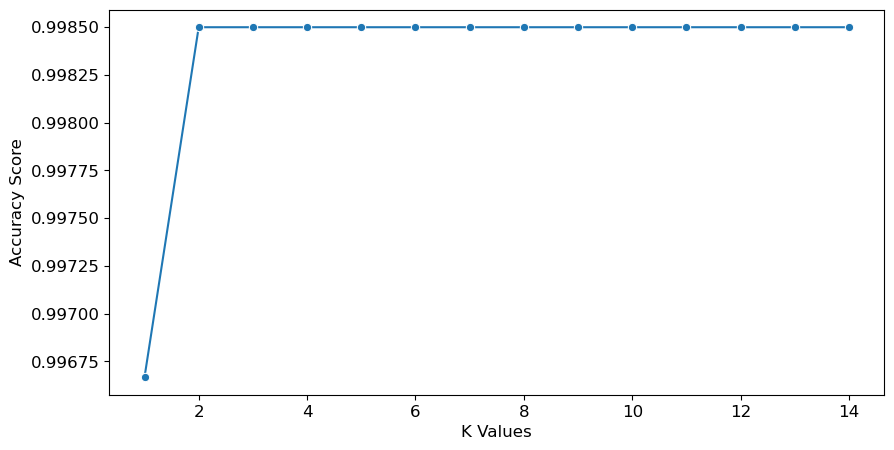

In [82]:
plt.rcParams['figure.figsize'] = [10, 5]


sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [83]:
k = 2

In [84]:
knn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

In [29]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [85]:
print("Best parameters: ", grid.best_estimator_)

Best parameters:  SVC(C=0.1, gamma=1)


In [86]:
svm_classifier = SVC(C=0.1, gamma=1).fit(X_train, y_train)

SVC(C=0.1, gamma=1)
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



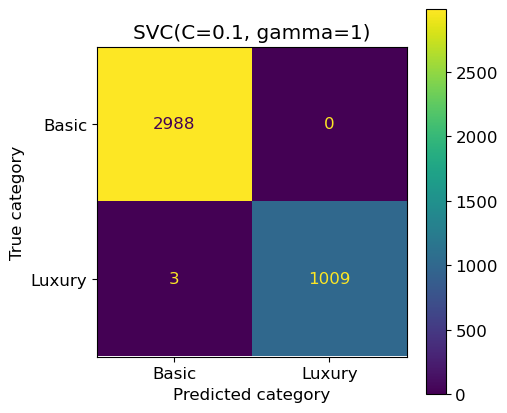

KNeighborsClassifier(n_neighbors=2)
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



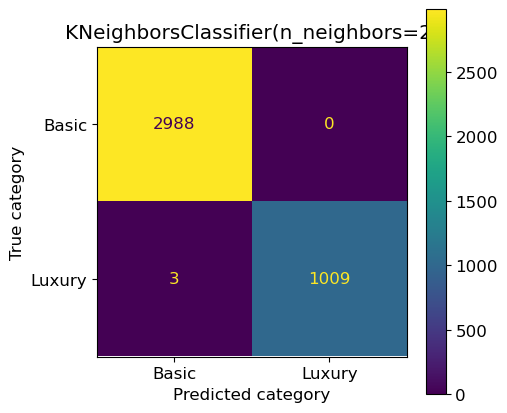

RandomForestClassifier()
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



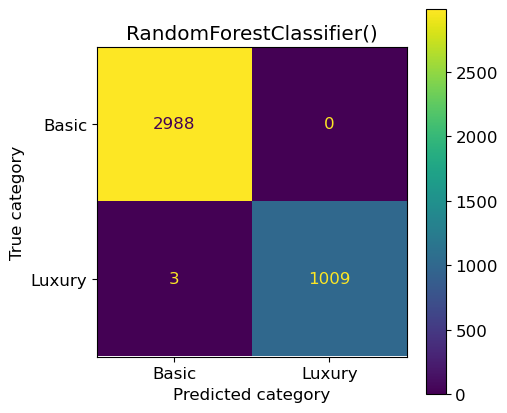

DecisionTreeClassifier()
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       0.99      1.00      0.99      1012

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



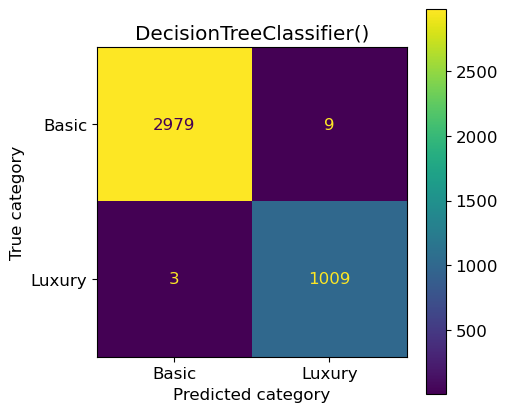

AdaBoostClassifier()
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2988
           1       1.00      1.00      1.00      1012

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



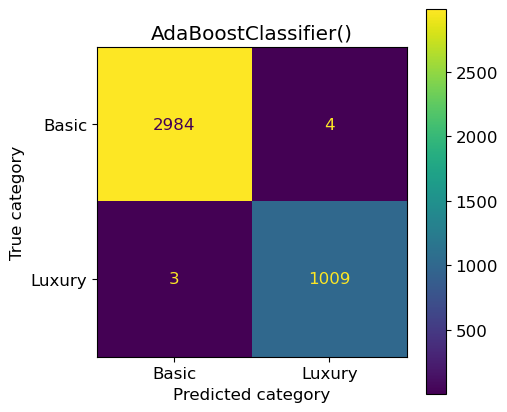

In [87]:
plt.rcParams['figure.figsize'] = [5, 5]


for model in [svm_classifier,knn_classifier,RF_classifier,DS_classifier, AdaBoost_classifier]:
    
    y_pred = model.predict(X_test)
    print(model)
    print("Report: \n", classification_report(y_test, y_pred))
    
    
    cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= df['category'].unique())
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title= model, 
                    xlabel='Predicted category', 
                    ylabel='True category')
    plt.show()
    
    